In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv")

print("DATASET")
print(df)

print("Nulos")
print(df.isnull().sum())

#Eliminando columna de indice
print(df.columns)
df_clean = df.drop("Unnamed: 0", axis=1)
print(df_clean)

DATASET
     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]
Nulos
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64
Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')
        TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..

In [3]:
#Separacion de los datos
x = df_clean.drop("sales",axis=1)
y = df_clean["sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [4]:
#Escalado
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [5]:
#Entrenamiento del modelo
modelo_regresion = LinearRegression(fit_intercept=True)
modelo_regresion.fit(x_train_scaled, y_train)

print("Modelo Entrenado")
print(f"Coeficientes {modelo_regresion.coef_.round(4)}")
print(f"Intercepto {modelo_regresion.intercept_:.4f}")

Modelo Entrenado
Coeficientes [3.8534 2.8444 0.0531]
Intercepto 14.3047


In [6]:
#Evaluacion del modelo
y_pred = modelo_regresion.predict(x_test_scaled)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)

print("Evaluacion del modelo")
print(f"R2 {r2:.4f} el modelo explica el {r2*100:.2f}% de las varianza")
print(f"MAE {mae:.2f}")
print(f"RMSE {rmse:.2f}")

Evaluacion del modelo
R2 0.8935 el modelo explica el 89.35% de las varianza
MAE 1.40
RMSE 1.70


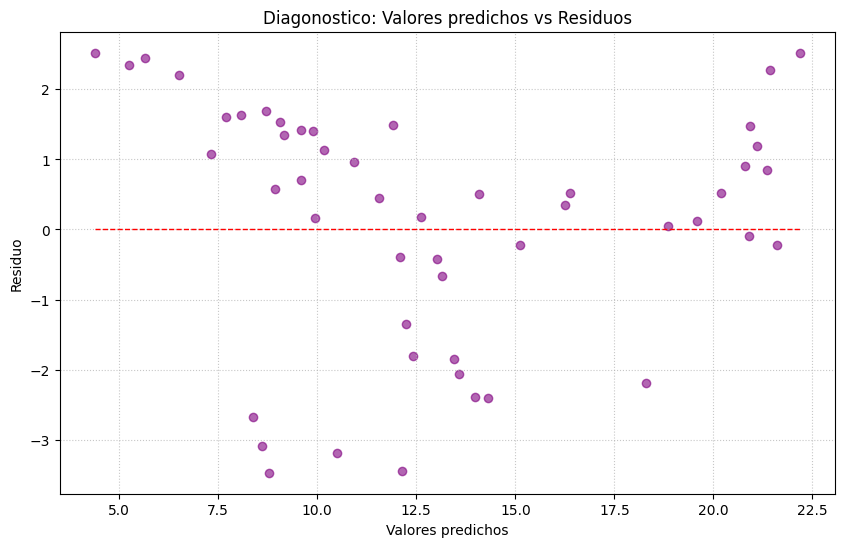

In [7]:
residuos = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuos, color='purple', alpha=0.6)
plt.hlines(y=0,xmin=y_pred.min(), xmax=y_pred.max(), color='red', linestyles='--', linewidth=1)
plt.title("Diagonostico: Valores predichos vs Residuos")
plt.ylabel("Residuo")
plt.xlabel("Valores predichos")
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()